# Introduction

We want to compare the offer in lisure and services between 2 big cities like Madrid and Berlin¡. Two of them are capital cities inside the European Union.

Berlin is the capital and largest city of Germany by both area and population. Its 3.8 million inhabitants make it the European Union's most populous city, according to population within city limits. One of Germany's sixteen constituent states, Berlin is surrounded by the State of Brandenburg and contiguous with Potsdam, Brandenburg's capital. Berlin's urban area, which has a population of around 4.5 million, is the second most populous urban area in Germany after the Ruhr. The Berlin-Brandenburg capital region has over six million inhabitants and is Germany's third-largest metropolitan region after the Rhine-Ruhr and Rhine-Main regions.

Madrid is the capital and most-populous city of Spain. The city has almost 3.4 million inhabitants and a metropolitan area population of approximately 6.7 million. It is the second-largest city in the European Union (EU), surpassed only by Berlin in its administrative limits, and its monocentric metropolitan area is the second-largest in the EU, surpassed only by Paris. The municipality covers 604.3 km2 (233.3 sq mi) geographical area.

Every year more than 6 million pepople visit Berlin looking for its touristic attraction. Madrid is one of the capital for the tourism. Every year receives more than 7 million visitors to the capital. But which one is offering the best number of services?

# Data
For this project data available on the Foursquare's API will be used. It will be used to check data in Berlin and Madridin terms of their neighborhoods. The data used includes information about different venues and their neighborhoods.

Info an access for Foursqure Api https://developer.foursquare.com/

Also we will extract the Berlin districts from Wikipedia: https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin
Also we will extract the Berlin districts from Wikipedia: https://en.wikipedia.org/wiki/Districts_of_Madrid

In [94]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't installed folium
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed geopy
! pip install folium==0.5.0
import folium # plotting library

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [95]:
# Library to handle data in a vectorized manner
import numpy as np 

# Library for data analsysis
import pandas as pd 

# Library to handle JSON files
import json 

# Convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# Library to handle requests
import requests 

# Tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

# Map rendering library
import folium 

# Import display for displaying map
from IPython.display import display

print('Libraries imported.')

Libraries imported.


In [159]:

#df = pd.read_csv('Capital_Cities.csv')

url = 'https://raw.githubusercontent.com/Jose-Javier-Nicolas/final-project/master/Berlin_areas.csv'
df = pd.read_csv(url,header=0,error_bad_lines=False, sep = ";")
df.head()

,City,District
0,Berlin,Charlottenburg-Wilmersdorf
1,Berlin,Friedrichshain-Kreuzberg
2,Berlin,Lichtenberg
3,Berlin,Marzahn-Hellersdorf
4,Berlin,Mitte


In [160]:
df.tail()

,City,District
28,Madrid,Villaverde
29,Madrid,Puente de Vallecas
30,Madrid,Vicalvaro
31,Madrid,San Blas-Canillejas
32,Madrid,Barajas


In [161]:
Berlin = df.where(df["City"] == "Berlin")

Berlin['Latitude'] = "NaN"
Berlin['Longitude'] = "NaN"

Berlin.dropna(inplace = True)
Berlin = Berlin.reset_index(drop = True)
Berlin.head()

,City,District,Latitude,Longitude
0,Berlin,Charlottenburg-Wilmersdorf,NaN,NaN
1,Berlin,Friedrichshain-Kreuzberg,NaN,NaN
2,Berlin,Lichtenberg,NaN,NaN
3,Berlin,Marzahn-Hellersdorf,NaN,NaN
4,Berlin,Mitte,NaN,NaN


In [162]:
Madrid = df.where(df["City"] == "Madrid")

Madrid['Latitude'] = "NaN"
Madrid['Longitude'] = "NaN"

Madrid.dropna(inplace = True)
Madrid = Madrid.reset_index(drop = True)
Madrid.head()

,City,District,Latitude,Longitude
0,Madrid,Centro,NaN,NaN
1,Madrid,Arganzuela,NaN,NaN
2,Madrid,Retiro,NaN,NaN
3,Madrid,Salamanca,NaN,NaN
4,Madrid,Chamartin,NaN,NaN


In [ ]:
#Latitude and Longitude for the Areas

In [164]:
# Latitute and Longitude of districts of Berlin
for i, row in Berlin.iterrows():
    districts = row["District"] + ",Berlin"
    geolocator = Nominatim(user_agent="mycapstoneproject")
    location = geolocator.geocode(districts)
               
    Berlin.at[i, "Latitude"] = location.latitude 
    Berlin.at[i, "Longitude"] = location.longitude

Berlin.head()

,City,District,Latitude,Longitude
0,Berlin,Charlottenburg-Wilmersdorf,52.5079,13.264
1,Berlin,Friedrichshain-Kreuzberg,52.5011,13.4443
2,Berlin,Lichtenberg,52.5322,13.5119
3,Berlin,Marzahn-Hellersdorf,52.5225,13.5877
4,Berlin,Mitte,52.5179,13.4041


In [165]:
# Latitute and Longitude of districts of Madrid
for i, row in Madrid.iterrows():
    districts = row["District"] + ",Madrid"
    geolocator = Nominatim(user_agent="mycapstoneproject")
    location = geolocator.geocode(districts)
               
    Madrid.at[i, "Latitude"] = location.latitude 
    Madrid.at[i, "Longitude"] = location.longitude

Madrid.head()

,City,District,Latitude,Longitude
0,Madrid,Centro,40.4177,-3.70791
1,Madrid,Arganzuela,40.397,-3.69729
2,Madrid,Retiro,40.4111,-3.67606
3,Madrid,Salamanca,40.427,-3.6806
4,Madrid,Chamartin,40.459,-3.67613


In [163]:
print(Madrid.dtypes)

City         object
District     object
Latitude     object
Longitude    object
dtype: object


In [152]:
# Convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

In [153]:

# Latitute and Longitude of districts of Berlin
for i, row in Berlin.iterrows():
    districts = row["District"] + ",Berlin"
    geolocator = Nominatim(user_agent="mycapstoneproject")
    location = geolocator.geocode(districts)
               
    Berlin.at[i, "Latitude"] = location.latitude 
    Berlin.at[i, "Longitude"] = location.longitude

Berlin.head()

,City,District,Latitude,Longitude
0,Berlin,Charlottenburg-Wilmersdorf,52.5079,13.264
1,Berlin,Friedrichshain-Kreuzberg,52.5011,13.4443
2,Berlin,Lichtenberg,52.5322,13.5119
3,Berlin,Marzahn-Hellersdorf,52.5225,13.5877
4,Berlin,Mitte,52.5179,13.4041


In [201]:

# Latitute and Longitude of Berlin

geolocator = Nominatim(user_agent = "berlin_adress")
location = geolocator.geocode("Berlin")
berlin_latitude, berlin_longitude = location.latitude,location.longitude
print('The geographical coordinates of Berlin are {}, {}.'.format(berlin_latitude, berlin_longitude))

The geographical coordinates of Berlin are 52.5170365, 13.3888599.


In [203]:
geolocator = Nominatim(user_agent = "madrid_adress")
location = geolocator.geocode("Madrid")
madrid_latitude, madrid_longitude = location.latitude,location.longitude
print('The geographical coordinates of Madrid {}, {}.'.format(madrid_latitude, madrid_longitude))

The geographical coordinates of Madrid 40.4167047, -3.7035825.


In [103]:
Berlin_map = folium.Map(location=[berlin_latitude, berlin_longitude], zoom_start=11, tiles='cartodbpositron')

for lat, lng, district in zip(Berlin['Latitude'], Berlin['Longitude'], 
                                  Berlin['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Berlin_map)  
    
display(Berlin_map)

In [168]:
Madrid_map = folium.Map(location=[madrid_latitude, madrid_longitude], zoom_start=11, tiles='cartodbpositron')

for lat, lng, district in zip(Madrid['Latitude'], Madrid['Longitude'], 
                                  Madrid['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Madrid_map)  
    
display(Madrid_map)

In [169]:

CLIENT_ID = 'PO452RBNDSMPYJJEV1LVKXJ5LVD5EVNHHYGOZOLIPOYAOWFY' # Foursquare ID
CLIENT_SECRET = 'ZW0Q5RVPGBJTG5GCBOCDJVIJSKT21GNRLQ4SNVGRJBBPQEBE' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

# Exploring Neighboorhoods

In [170]:
def getNearbyVenues(cities, names, latitudes, longitudes, radius=500, LIMIT = 500):
    
    venues_list=[]
    for cities, name, lat, lng in zip(cities, names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            cities,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City',
                  'District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [171]:
cities = pd.concat([Madrid, Berlin])

venues = getNearbyVenues(cities=cities['City'],
                                names=cities['District'],
                                   latitudes=cities['Latitude'],
                                   longitudes=cities['Longitude']
                                  )

Centro
Arganzuela
Retiro
Salamanca
Chamartin
Tetuan
Chamberi
Fuencarral-El Pardo
Moncloa-Aravaca
Latina
Carabanchel
Usera
Puente de Vallecas
Moratalaz
Ciudad Lineal
Hortaleza
Villaverde
Puente de Vallecas
Vicalvaro
San Blas-Canillejas
Barajas
Charlottenburg-Wilmersdorf
Friedrichshain-Kreuzberg
Lichtenberg
Marzahn-Hellersdorf
Mitte
Neukoelln
Pankow
Reinickendorf
Spandau
Steglitz-Zehlendorf
Tempelhof-Schoeneberg
Treptow-Koepenick


In [172]:
venues.head(10)

,City,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Madrid,Centro,40.417653,-3.707914,Plaza de Isabel II,40.418114,-3.709397,Plaza
1,Madrid,Centro,40.417653,-3.707914,La Esquina del Real,40.417356,-3.710364,French Restaurant
2,Madrid,Centro,40.417653,-3.707914,Cerveceria Erte,40.419241,-3.707470,Bar
3,Madrid,Centro,40.417653,-3.707914,Torrons Vicens: Artesa D' Agramunt,40.416095,-3.708119,Pastry Shop
4,Madrid,Centro,40.417653,-3.707914,TOC Hostel,40.417264,-3.705928,Hostel
5,Madrid,Centro,40.417653,-3.707914,Zen Zoo,40.416263,-3.707174,Smoothie Shop
6,Madrid,Centro,40.417653,-3.707914,Trattoria Malatesta,40.416788,-3.707182,Italian Restaurant
7,Madrid,Centro,40.417653,-3.707914,Plaza Mayor,40.415527,-3.707506,Plaza
8,Madrid,Centro,40.417653,-3.707914,Gyoza Go!,40.416179,-3.708612,Dumpling Restaurant
9,Madrid,Centro,40.417653,-3.707914,Santa Eulalia Boulangerie Pâtisserie,40.417153,-3.709778,Pie Shop


In [204]:

cities_by_venues = venues.groupby("City").count()
print ("Number of venues in Berlin is {}. \
       \nNumber of venues in Madrid is {}." .format(cities_by_venues["District"][0], cities_by_venues["District"][1]))

Number of venues in Berlin is 336.        
Number of venues in Madrid is 585.


In [174]:
districts_by_venues = venues.groupby("District").count()
districts_by_venues = districts_by_venues["City"]
districts_by_venues

District
Arganzuela                     37
Barajas                        40
Carabanchel                    13
Centro                         92
Chamartin                      43
Chamberi                       82
Charlottenburg-Wilmersdorf     11
Ciudad Lineal                  29
Friedrichshain-Kreuzberg      100
Hortaleza                      18
Latina                          7
Lichtenberg                     8
Marzahn-Hellersdorf            11
Mitte                          58
Moncloa-Aravaca                 3
Moratalaz                      17
Neukoelln                      76
Pankow                          3
Puente de Vallecas             18
Reinickendorf                   4
Retiro                         23
Salamanca                      92
San Blas-Canillejas             9
Spandau                        47
Steglitz-Zehlendorf             6
Tempelhof-Schoeneberg           9
Tetuan                         38
Treptow-Koepenick               3
Usera                          17
Vical

In [175]:

print('There are {} unique categories.' .format(len(venues['Venue Category'].unique())))

There are 193 unique categories.


In [176]:
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

onehot['District'] = venues['District'] 
#onehot['Number of venues'] = districts_by_venues["City"]
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,District,ATM,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Auto Workshop,...,Trail,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Centro,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
cities_grouped = onehot.groupby('District').mean().reset_index()
cities_grouped.head()

,District,ATM,Accessories Store,American Restaurant,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Auto Workshop,...,Trail,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,Arganzuela,0.0,0.0,0.0,0.000000,0.00000,0.027027,0.0,0.000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
1,Barajas,0.0,0.0,0.0,0.000000,0.05000,0.000000,0.0,0.025,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.025000,0.0,0.0,0.0,0.0
2,Carabanchel,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0
3,Centro,0.0,0.0,0.0,0.000000,0.01087,0.000000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.01087,0.0,0.021739,0.0,0.0,0.0,0.0
4,Chamartin,0.0,0.0,0.0,0.023256,0.00000,0.000000,0.0,0.000,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0


In [178]:
num_top_venues = 7

for hood in cities_grouped['District']:
    print("----"+hood+"----")
    temp = cities_grouped[cities_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arganzuela----
                      venue  freq
0          Tapas Restaurant  0.14
1                    Bakery  0.08
2  Mediterranean Restaurant  0.05
3                    Market  0.05
4               Beer Garden  0.05
5        Spanish Restaurant  0.05
6                Restaurant  0.05


----Barajas----
                    venue  freq
0                   Hotel  0.22
1      Spanish Restaurant  0.12
2        Tapas Restaurant  0.05
3  Argentinian Restaurant  0.05
4              Restaurant  0.05
5             Snack Place  0.02
6           Metro Station  0.02


----Carabanchel----
                venue  freq
0    Tapas Restaurant  0.15
1  Spanish Restaurant  0.15
2          Restaurant  0.15
3               Hotel  0.08
4   Food & Drink Shop  0.08
5                Café  0.08
6       Metro Station  0.08


----Centro----
                venue  freq
0               Plaza  0.12
1  Spanish Restaurant  0.10
2               Hotel  0.08
3    Tapas Restaurant  0.05
4           Bookstore  0.04
5   

In [179]:

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [180]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = cities_grouped['District']

for ind in np.arange(cities_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arganzuela,Tapas Restaurant,Bakery,Mediterranean Restaurant,Market,Spanish Restaurant,Restaurant,Beer Garden,Cocktail Bar,Falafel Restaurant,Burger Joint
1,Barajas,Hotel,Spanish Restaurant,Argentinian Restaurant,Tapas Restaurant,Restaurant,Plaza,Snack Place,Breakfast Spot,Brewery,Sandwich Place
2,Carabanchel,Spanish Restaurant,Restaurant,Tapas Restaurant,Hotel,Candy Store,Metro Station,Food & Drink Shop,Supermarket,Café,Grocery Store
3,Centro,Plaza,Spanish Restaurant,Hotel,Tapas Restaurant,Bookstore,Gourmet Shop,Hostel,Pastry Shop,Clothing Store,Italian Restaurant
4,Chamartin,Spanish Restaurant,Restaurant,Grocery Store,Supermarket,Plaza,Tapas Restaurant,Mediterranean Restaurant,Bakery,Bar,Health & Beauty Service
5,Chamberi,Spanish Restaurant,Tapas Restaurant,Bar,Restaurant,Café,Theater,Bakery,Plaza,Mediterranean Restaurant,Coffee Shop
6,Charlottenburg-Wilmersdorf,Italian Restaurant,Plaza,Hotel,Bus Stop,Indian Restaurant,Light Rail Station,Comedy Club,Café,Pizza Place,Auto Workshop
7,Ciudad Lineal,Spanish Restaurant,Pizza Place,Argentinian Restaurant,Restaurant,Burger Joint,Gastropub,Supermarket,Hotel,Tapas Restaurant,Cocktail Bar
8,Friedrichshain-Kreuzberg,Café,Bar,Hotel,Vietnamese Restaurant,Ice Cream Shop,Bakery,Pub,Italian Restaurant,Hotel Bar,Shoe Store
9,Hortaleza,Spanish Restaurant,Supermarket,Park,Metro Station,Sandwich Place,Garden,Bar,Bakery,Café,Plaza


In [181]:
# set number of clusters
kclusters = 5

grouped_clustering = cities_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 3, 0], dtype=int32)

In [182]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cities_merged = cities

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cities_merged = cities_merged.join(neighborhoods_venues_sorted.set_index('District'), on='District', how = 'right')

 # check the last columns!
cities_merged.head()

,City,District,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Madrid,Centro,40.4177,-3.70791,Plaza,Spanish Restaurant,Hotel,Tapas Restaurant,Bookstore,Gourmet Shop,Hostel,Pastry Shop,Clothing Store,Italian Restaurant
1,Madrid,Arganzuela,40.397,-3.69729,Tapas Restaurant,Bakery,Mediterranean Restaurant,Market,Spanish Restaurant,Restaurant,Beer Garden,Cocktail Bar,Falafel Restaurant,Burger Joint
2,Madrid,Retiro,40.4111,-3.67606,Spanish Restaurant,Garden,Supermarket,Plaza,Jazz Club,Brewery,Mediterranean Restaurant,Dog Run,Board Shop,Diner
3,Madrid,Salamanca,40.427,-3.6806,Restaurant,Spanish Restaurant,Clothing Store,Tapas Restaurant,Burger Joint,Furniture / Home Store,Mediterranean Restaurant,Italian Restaurant,Mexican Restaurant,Coffee Shop
4,Madrid,Chamartin,40.459,-3.67613,Spanish Restaurant,Restaurant,Grocery Store,Supermarket,Plaza,Tapas Restaurant,Mediterranean Restaurant,Bakery,Bar,Health & Beauty Service


In [195]:
map_clusters = folium.Map(location=['Latitude', 'Longitude'], zoom_start=11)

x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi  in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['Neighborhood'],kmeans.labels_):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow, fill=True, fill_color=rainbow, fill_opacity=0.7).add_to(map_clusters)
map_clusters

TypeError: must be real number, not str

In [193]:
map_clusters = folium.Map(location=[madrid_latitude, madrid_longitude], zoom_start=11, tiles='cartodbpositron')

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['District']):
    label = folium.Popup(str(poi), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow,
        fill=True,
        fill_color=rainbow,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [197]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comment_words = ' '
stopwords = set(STOPWORDS)

cities_merged_berlin = cities_merged.where(cities_merged["City"] == "Berlin")
cities_merged_berlin.dropna(inplace = True)

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [198]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comment_words = ' '
stopwords = set(STOPWORDS)

cities_merged_madrid = cities_merged.where(cities_merged["City"] == "Madrid")
cities_merged_madrid.dropna(inplace = True)

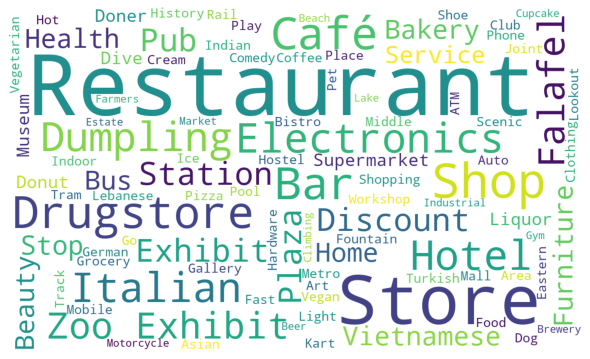

In [199]:
for i, row in cities_merged_berlin.iterrows():
    comment_words = comment_words + row['1st Most Common Venue'] + ' ' + row['2nd Most Common Venue'] + ' ' + row['3rd Most Common Venue'] + ' ' + row['4th Most Common Venue'] + ' ' + row['5th Most Common Venue'] + ' ' + row['6th Most Common Venue'] + ' ' + row['7th Most Common Venue'] + ' ' + row['8th Most Common Venue'] + ' ' + row['9th Most Common Venue'] + ' ' + row['10th Most Common Venue'] + ' '

wordcloud = WordCloud(width = 1200, height = 720, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

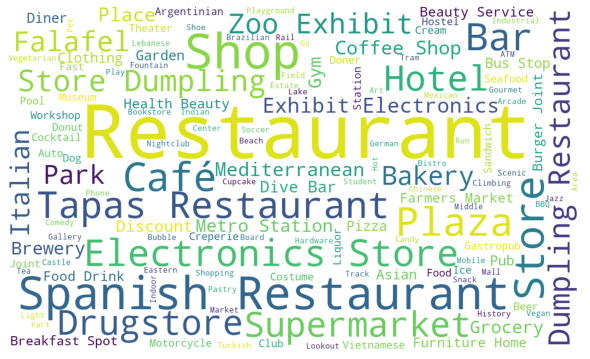

In [200]:
for i, row in cities_merged_madrid.iterrows():
    comment_words = comment_words + row['1st Most Common Venue'] + ' ' + row['2nd Most Common Venue'] + ' ' + row['3rd Most Common Venue'] + ' ' + row['4th Most Common Venue'] + ' ' + row['5th Most Common Venue'] + ' ' + row['6th Most Common Venue'] + ' ' + row['7th Most Common Venue'] + ' ' + row['8th Most Common Venue'] + ' ' + row['9th Most Common Venue'] + ' ' + row['10th Most Common Venue'] + ' '

wordcloud = WordCloud(width = 1200, height = 720, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Discussion
Berlin is a very large city and the capital of Germany. It is home to the vast majority of the country's population. It is also notable for the concentration of companies located in the city. It is normal for a city of this size to offer many services to the population. Many of them are not directly related to tourism but can be an attraction.

For example, the offer in restaurants and coffee shops is very high, responding to the demand of the local population and not only to tourism.

Otherwise Madrid is more fragmentes and splited in more areas than Berlin. Madrid has less habitants than Berlin but receives more number of visitors.



# Conclussions
Restaurants and shopping (Flea Markets) are the commun attractives in the City. Followed by Exhibitions and Museums. We could say the the offer of services for tourists is quite extensive. One of the most interesting topics in Berlin are related with gastronomy. Tha activities related with shopping are more frecuently in Berlin than Madrid. It has a significant weight of exhibitions and cultural activities as museum and Zoos.

The main activity in Madrid are reastaurants and tapas Bar. The main of the services in all the areas are related with the gastronomy. It mean there is a high quantaty of this kind of services than in Berlin.